<a href="https://colab.research.google.com/github/santiagofloresm/ENEL645-Team25-FinalProject/blob/santiago-xception/FinalProject-Phase2_Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project
## Team 25
Santiago Flores - 30119885

Davis Allan - 10016543

Jordan Joorisity - 30117950

Patrick Pickard - 30116807

Joshua Posyluzny - 30118206

# 1. Loading and pre-processing the dataset

### 1.1 Clone the repository

In [ ]:
!git clone -b dev https://github.com/santiagofloresm/ENEL645-Team25-FinalProject.git

Cloning into 'ENEL645-Team25-FinalProject'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 156942 (delta 43), reused 14 (delta 5), pack-reused 156860
Receiving objects: 100% (156942/156942), 2.86 GiB | 42.43 MiB/s, done.
Resolving deltas: 100% (234/234), done.
Checking out files: 100% (168575/168575), done.


In [ ]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1.2 Define the paths

In [ ]:
train_folder = 'ENEL645-Team25-FinalProject/Dataset/Train'
test_folder = 'ENEL645-Team25-FinalProject/Dataset/Alternative_Test'
validation_folder = 'ENEL645-Team25-FinalProject/Dataset/Validation'

### 1.3 Data display

There are 29 classes in the dataset, one for each letter in the English alphabet, one for space, one for delete and a blank one. Below is an exmaple of each one

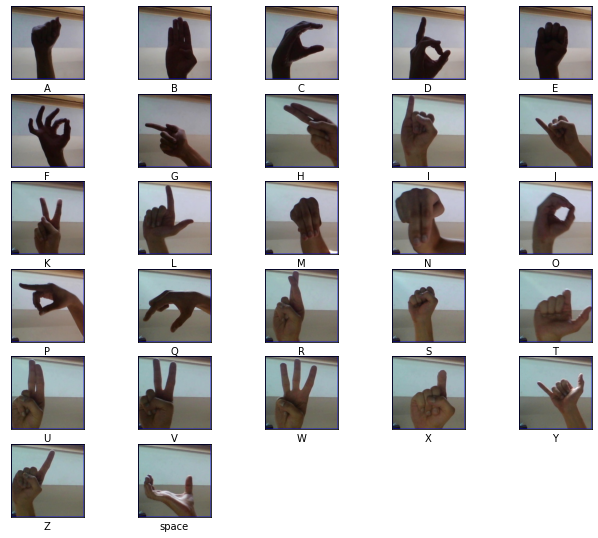

In [ ]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'space']

plt.figure(figsize=(11,11))
for i in range (0,27):
  plt.subplot(7,5, i+1)
  plt.xticks([])
  plt.yticks([])
  path = train_folder + "/" + classes[i] + "/" + classes[i] + "2.jpg"
  img = plt.imread(path)
  plt.imshow(img)
  plt.xlabel(classes[i])

### 1.5 Data import and augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

image_input_dimensions_3d = (200,200,3)
image_input_dimensions_2d = (200,200)
batch_size = 32
seed = 32

#### 1.5.1 Training data

In [ ]:
train_data_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.xception.preprocess_input)

train_generator = train_data_gen.flow_from_directory(train_folder, 
                                                     batch_size=batch_size, 
                                                     seed=seed, 
                                                     target_size=image_input_dimensions_2d,
                                                     interpolation="nearest", 
                                                     class_mode="categorical",
                                                     subset="training")

Found 69600 images belonging to 29 classes.


In [ ]:
train_generator.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28}

#### 1.5.2 Data display after augmentation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

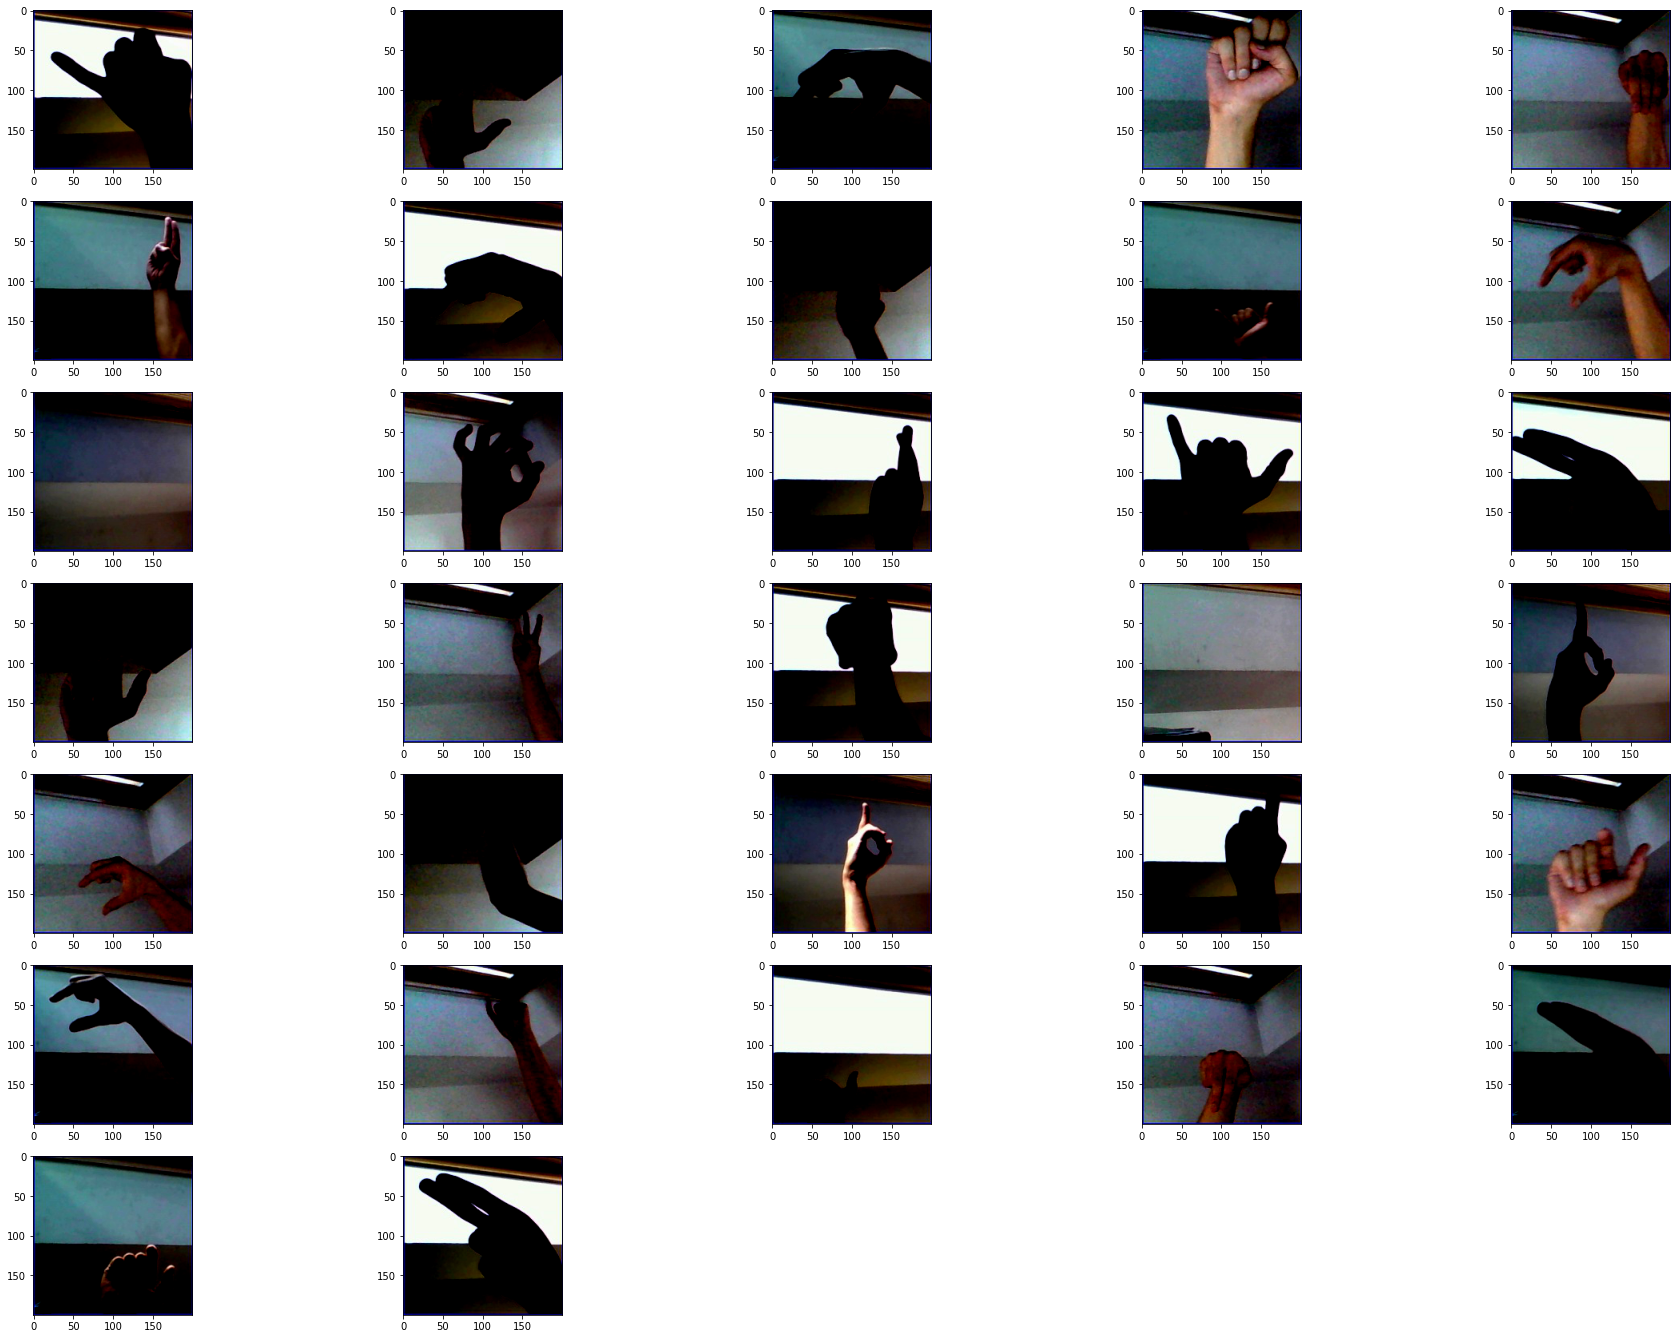

In [ ]:
plt.figure(figsize = (32,24))
Xbatch, Ybatch = train_generator.__getitem__(0)
for ii in range (batch_size):
  plt.subplot(7,5,ii+1)
  plt.imshow(Xbatch[ii])

plt.show()

### Training image analysis

In [ ]:
  h, w, r = train_generator.image_shape
  print('There are', train_generator.samples, 'images for training the model')
  print("Approximately {:.0f} images per category".format(train_generator.samples/train_generator.num_classes))
  print('The shape of each image is', train_generator.image_shape)
  print('From which:')
  print('The width is', w)
  print('The height is', h)
  print('And each pixel has a value for each component of RGB for a total of', r)

There are 69600 images for training the model
Approximately 2400 images per category
The shape of each image is (200, 200, 3)
From which:
The width is 200
The height is 200
And each pixel has a value for each component of RGB for a total of 3


#### 1.5.2 Validation data

In [ ]:
# this will simply scale the validation image set the same way as the test and train is done, encode the data to 'categorical' (one_hot_encoder equivalent) and store it in an identical object type

val_data_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.xception.preprocess_input)

val_generator = val_data_gen.flow_from_directory(validation_folder, 
                                                     batch_size=batch_size, 
                                                     seed=seed, 
                                                     target_size=image_input_dimensions_2d,
                                                     interpolation="nearest", 
                                                     class_mode="categorical")

Found 8700 images belonging to 29 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

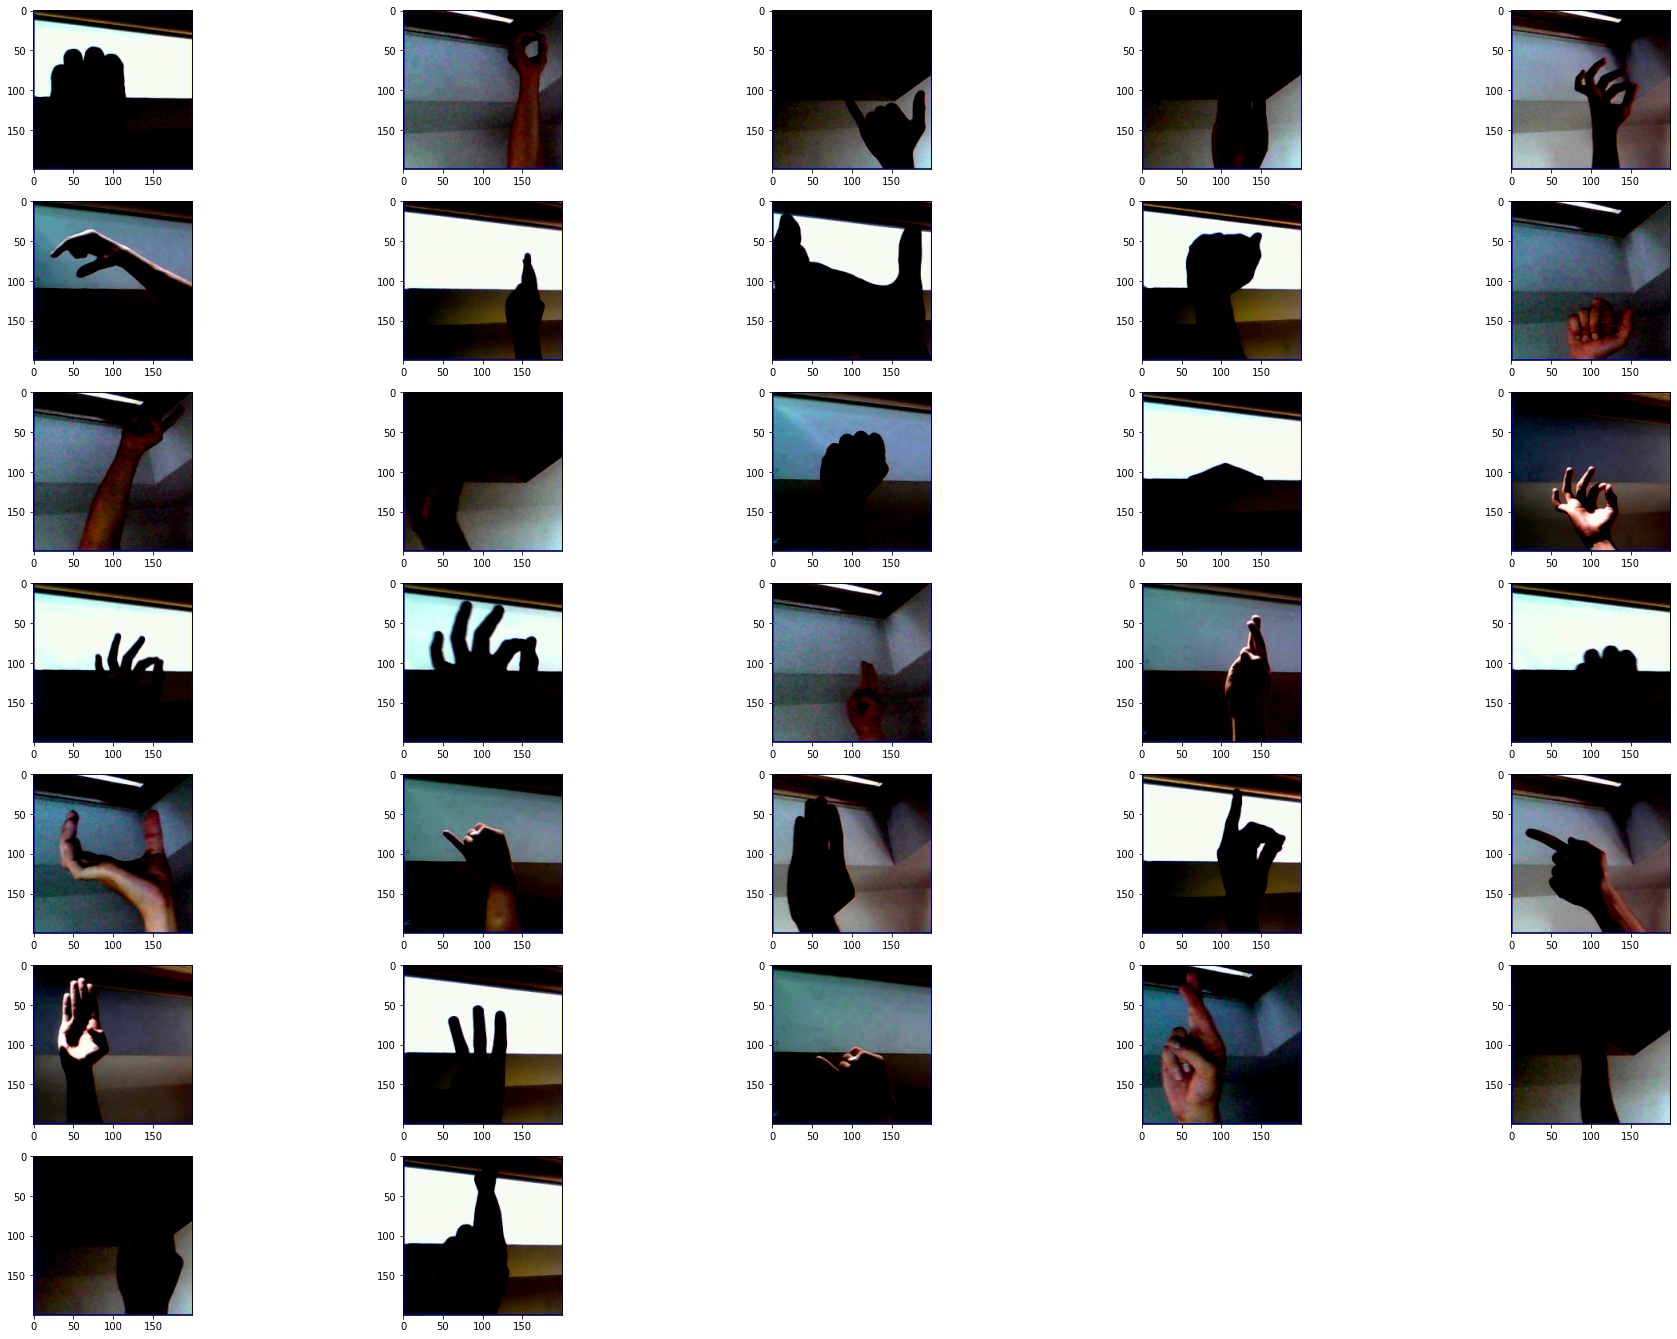

In [ ]:
plt.figure(figsize = (32,24))
Xbatch_val, Ybatch_val = val_generator.__getitem__(0)
for ii in range (batch_size):
  plt.subplot(7,5,ii+1)
  plt.imshow(Xbatch_val[ii])

plt.show()

#### 1.5.3 Alternative Test data

In [ ]:
alternative_test_data_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.xception.preprocess_input)

alternative_test_generator = alternative_test_data_gen.flow_from_directory(test_folder, 
                                                     batch_size=batch_size, 
                                                     seed=seed, 
                                                     target_size=image_input_dimensions_2d,
                                                     interpolation="nearest", 
                                                     class_mode="categorical",
                                                     subset="training")

Found 870 images belonging to 29 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

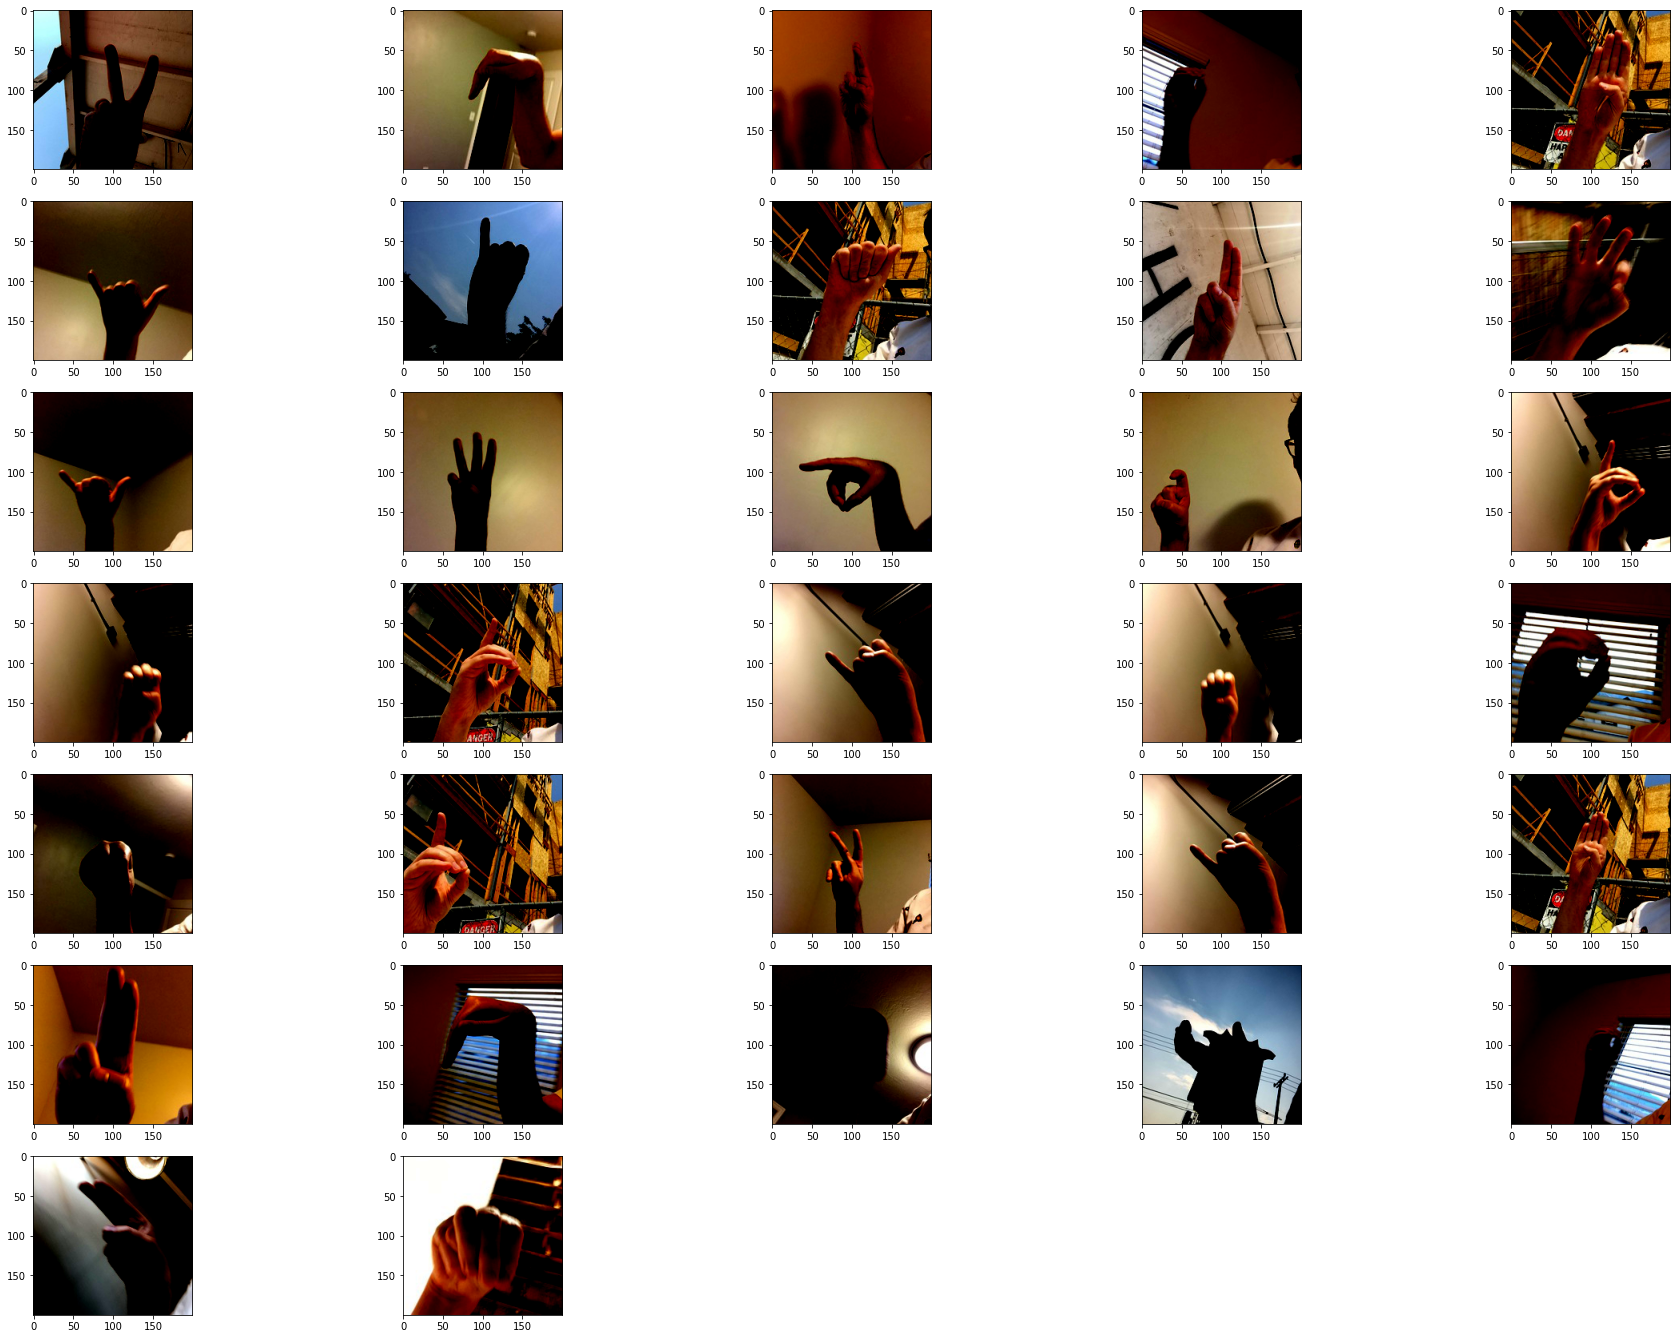

In [ ]:
plt.figure(figsize = (32,24))
Xbatch_test_alt, Ybatch_test_alt = alternative_test_generator.__getitem__(0)
for ii in range (batch_size):
  plt.subplot(7,5,ii+1)
  plt.imshow(Xbatch_test_alt[ii])

plt.show()

### 1.6 Train test split

In [ ]:
print('After the split there are:')
print(train_generator.samples, 'images on the train split')
print(val_generator.samples, 'images on the validation split')
print(alternative_test_generator.samples, 'images on the alternative test split')
print('For each category 90% of the images are in the train split and 10% in the validation split')

After the split there are:
69600 images on the train split
8700 images on the validation split
870 images on the alternative test split
For each category 90% of the images are in the train split and 10% in the validation split



### 2.0 Transfer Learning

### 2.1 Choose and load the pre-trained model without the top

In [ ]:
# Xception model

base_model = tf.keras.applications.Xception(
    include_top=False,
    weights='imagenet',
    input_shape=image_input_dimensions_3d,
)

83689472/83683744 [==============================] - 1s 0us/step


### 2.2 Freeze the layers for this pre-trained model

In [ ]:
base_model.trainable = False

In [ ]:
print(base_model.summary())

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 99, 99, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 99, 99, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 99, 99, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

### 2.3 Add a top to this model (top represents the prediction layers)

In [ ]:
epochs = 5
lr = 1e-4
gradient_clip = 0.1
weight_decay = 1e-4

In [ ]:
def model_Xception(lr=1e-4):
  input_image = tf.keras.Input(shape=(image_input_dimensions_3d))

  x1 = base_model(input_image, training=False)

  flat = tf.keras.layers.Flatten()(x1)
  flat_drop = tf.keras.layers.Dropout(0.1)(flat)
  out = tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')(flat_drop)

  model = tf.keras.Model(inputs = input_image, outputs = out)

  model.compile(optimizer=tf.keras.optimizers.Adam(
    lr = lr,
    clipvalue = gradient_clip,
    decay = weight_decay),
    loss='categorical_crossentropy',
    metrics = ['accuracy']
    )
  
  return model

model = model_Xception(lr)

In [ ]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dropout (Dropout)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 29)                2910237   
Total params: 23,771,717
Trainable params: 2,910,237
Non-trainable params: 20,861,480
_________________________________________________________________
None


### 2.4 Define our model callbacks

In [ ]:
model_name = "xception_model"
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

monitor = tf.keras.callbacks.ModelCheckpoint(model_name, 
                                             monitor = 'val_loss', 
                                             verbose = 0, 
                                             save_best_only = True, 
                                             save_weights_only = True, 
                                             mode = 'min'
                                             )

def scheduler(epoch, lr):
  if epoch % 5 == 0:
    lr = lr/2
  return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=0)

### 2.5 Model training

In [ ]:
history = model.fit(
    train_generator, 
    batch_size=batch_size, 
    epochs=epochs, 
    verbose=1, 
    callbacks=[early_stop, monitor, lr_schedule], 
    validation_data=(val_generator)
    )

Epoch 1/5
2175/2175 [==============================] - 365s 153ms/step - loss: 0.5191 - accuracy: 0.8749 - val_loss: 0.0400 - val_accuracy: 0.9944
Epoch 2/5
2175/2175 [==============================] - 337s 155ms/step - loss: 0.0237 - accuracy: 0.9976 - val_loss: 0.0144 - val_accuracy: 0.9987
Epoch 3/5
2175/2175 [==============================] - 337s 155ms/step - loss: 0.0092 - accuracy: 0.9993 - val_loss: 0.0084 - val_accuracy: 0.9990
Epoch 4/5
2175/2175 [==============================] - 337s 155ms/step - loss: 0.0041 - accuracy: 0.9999 - val_loss: 0.0056 - val_accuracy: 0.9993
Epoch 5/5
2175/2175 [==============================] - 337s 155ms/step - loss: 0.0022 - accuracy: 0.9999 - val_loss: 0.0039 - val_accuracy: 0.9995


### 2.6 Re-train model with all layers un-frozen 

In [ ]:
base_model = tf.keras.applications.Xception(
    include_top=False,
    weights='imagenet',
    input_shape=image_input_dimensions_3d,
)
base_model.trainable = True

In [ ]:
input_image = tf.keras.Input(shape=(image_input_dimensions_3d))

x1 = base_model(input_image, training=True)

flat = tf.keras.layers.Flatten()(x1)
flat_drop = tf.keras.layers.Dropout(0.1)(flat)
out = tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')(flat_drop)

model = tf.keras.Model(inputs = input_image, outputs = out)

model.compile(optimizer=tf.keras.optimizers.Adam(
  lr = lr,
  clipvalue = gradient_clip,
  decay = weight_decay),
  loss='categorical_crossentropy',
  metrics = ['accuracy']
  )

print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100352)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 29)                2910237   
Total params: 23,771,717
Trainable params: 23,717,189
Non-trainable params: 54,528
_________________________________________________________________
None


In [ ]:
model.load_weights(model_name)

history = model.fit(
    train_generator, 
    batch_size=batch_size, 
    epochs=epochs, 
    verbose=1, 
    callbacks=[early_stop, monitor, lr_schedule], 
    validation_data=(val_generator)
    )

Epoch 1/5
2175/2175 [==============================] - 1536s 704ms/step - loss: 0.1360 - accuracy: 0.9633 - val_loss: 0.0044 - val_accuracy: 0.9986
Epoch 2/5
2175/2175 [==============================] - 1520s 699ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0023 - val_accuracy: 0.9994
Epoch 3/5
2175/2175 [==============================] - 1544s 710ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 5.2907e-04 - val_accuracy: 1.0000
Epoch 4/5
2175/2175 [==============================] - 1550s 713ms/step - loss: 3.3843e-04 - accuracy: 0.9999 - val_loss: 0.0010 - val_accuracy: 0.9995
Epoch 5/5
2175/2175 [==============================] - 1537s 706ms/step - loss: 6.0129e-04 - accuracy: 0.9998 - val_loss: 4.2077e-04 - val_accuracy: 0.9999


Saving model training history

In [ ]:
import numpy as np

np.save('model_history.npy', history.history)

Loading model training history

In [ ]:
training_history = np.load('/content/ENEL645-Team25-FinalProject/Model Training History/model_history.npy',allow_pickle='TRUE').item()

# 3 Testing the model and extracting relevant metrics

In [ ]:
model.load_weights(model_name)

### 3.1 Accuracy on test dataset

In [ ]:
metrics = model.evaluate(alternative_test_generator)
print("This is the alternative dataset we found, and shows that this model (in its current state), does not generalize well at all.")
print("Categorical cross-entropy:", round(metrics[0], 3))
print("Accuracy:", round(metrics[1]*100, 2),'%')

28/28 [==============================] - 4s 157ms/step - loss: 2.2395 - accuracy: 0.5494
This is the alternative dataset we found, and shows that this model (in its current state), does not generalize well at all.
Categorical cross-entropy: 2.24
Accuracy: 54.94 %


Test loss (cross-entropy and accuracy): [2.3117458820343018, 0.5494253039360046]



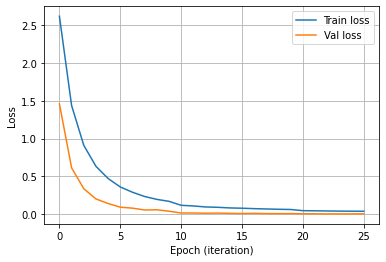

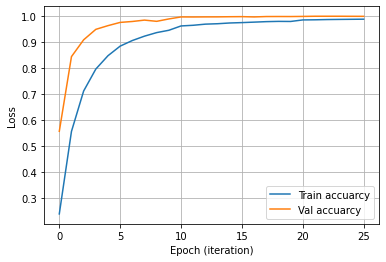

In [ ]:
loss = model.evaluate(alternative_test_generator, verbose=0)
print('Test loss (cross-entropy and accuracy):', loss)
print()

plt.plot(training_history['loss'], label = "Train loss")
plt.plot(training_history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(training_history['accuracy'], label = "Train accuarcy")
plt.plot(training_history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()